# 1- Read Data 

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import math
data = pd.read_csv('logsData.csv')


In [114]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [116]:
def formatArabicSentences(sentences):
   formatedSentences = arabic_reshaper.reshape(sentences)
   return get_display(formatedSentences)

# 2- Lets Look At The Data

In [4]:
data.head()

,StatusLabel,EventTime,Method,Status,UrlPath,ClientIP,Device,Browser,UrlQuery,UserAgent,...,BytesReceived,RefererSite,RefererPath,RefererQuery,FileExtension,StartTime,Host,OSFamily,OS,RequestStatus
0,Success,9/30/2021 2:59:53 AM,GET,200,/pg/getleg.asp,157.55.39.80,Spider,bingbot 2.0,id=17145,Mozilla/5.0+(compatible;+bingbot/2.0;++http://...,...,296,NaN,NaN,NaN,asp,9/30/2021 2:59:51 AM,muqtafi.birzeit.edu,Other,Other,200 Success
1,Success,9/30/2021 2:59:43 AM,GET,200,/legalLexicon/thes.aspx,185.191.171.45,Spider,SemrushBot 7,lang=ar&ser=2464,Mozilla/5.0+(compatible;+SemrushBot/7~bl;++htt...,...,332,NaN,NaN,NaN,aspx,9/30/2021 2:59:42 AM,muqtafi.birzeit.edu,Other,Other,200 Success
2,Success,9/30/2021 2:59:30 AM,GET,200,/legalLexicon/legal_lexicon.aspx,196.75.191.204,Other,Chrome 94.0.4606,u_letter=%D8%A7&lang=ar,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,...,583,www.google.com,NaN,NaN,aspx,9/30/2021 2:59:16 AM,muqtafi.birzeit.edu,Windows 10,Windows 10,200 Success
3,Success,9/30/2021 2:59:18 AM,GET,200,/legalLexicon/thes.aspx,66.249.70.30,Spider,Googlebot 2.1,lang=ar&ser=4725,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,...,370,NaN,NaN,NaN,aspx,9/30/2021 2:59:17 AM,muqtafi.birzeit.edu,Other,Other,200 Success
4,Success,9/30/2021 2:58:35 AM,GET,200,/legalLexicon/thes.aspx,114.119.149.169,Generic Smartphone,PetalBot,lang=ar&ser=425,Mozilla/5.0+(Linux;+Android+7.0;)+AppleWebKit/...,...,443,NaN,NaN,NaN,aspx,9/30/2021 2:58:33 AM,176.119.250.243,Android,Android 7.0,200 Success


# Analyze User Actions

([<matplotlib.patches.Wedge at 0x1fc3ad43ac0>,
 [Text(-0.9679918111792882, 0.5224862232536294, 'Search Actions'),
  Text(0.9679918111792885, -0.522486223253629, 'User Returned to search page')],
 [Text(-0.5279955333705207, 0.28499248541107053, '84%'),
  Text(0.5279955333705209, -0.28499248541107036, '16%')])

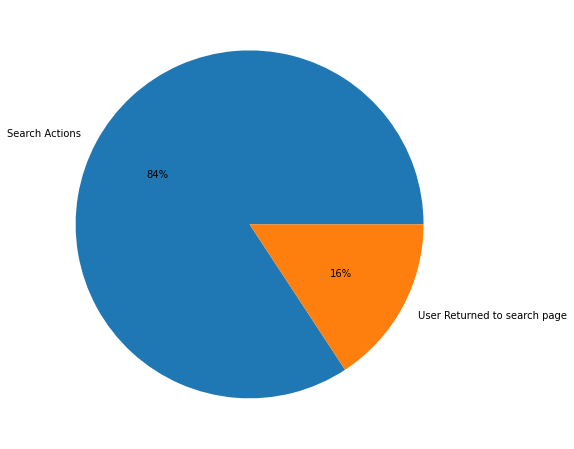

In [161]:
# No Results Returned

# All search actions
searchResultPath = data[data['UrlPath'] == '/Legislation/Result.aspx']
# The user returned from the result page to the search page again
userMovedTosearchAgain = data[((data['RefererPath'] == 'Legislation/Result.aspx') & (data['UrlPath'] == '/Legislation/LegSearch.aspx'))]
plt.figure(figsize=(12, 8))
plt.pie([(searchResultPath['UrlPath'].size - userMovedTosearchAgain['UrlPath'].size),userMovedTosearchAgain['UrlPath'].size]
       , labels = ['Search Actions', 'User Returned to search page'], autopct='%1.0f%%')

<BarContainer object of 5 artists>

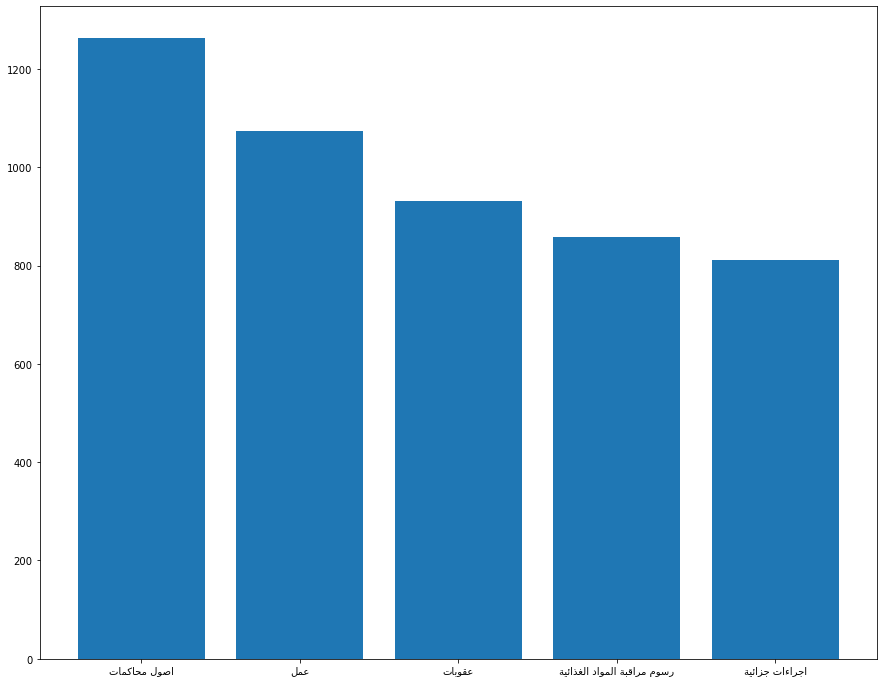

In [165]:
cleanData = data.dropna()
urlQueryIdData = cleanData[cleanData['UrlQuery'].str.startswith('id=')]
urlQuerygroupedByIdValues = urlQueryIdData.groupby( data['UrlQuery'],as_index=False).size()
idValuesData = urlQuerygroupedByIdValues.replace({'id=':''}, regex=True)
idValuesData.sort_values(['size'], ascending=False, inplace=True)
firstFiveValues = pd.DataFrame(idValuesData.head(5))
# 1 -  'قانون أصول المحاكمات المدنية والتجارية رقم (2) لسنة 2001',
# 2 -  '[ قانون العمل رقم (7) لسنة 2000 ]',
# 3 - 'قانون العقوبات [رقم 16] لسنة 1960',
# 4 - 'رسوم مراقبة المواد الغذائية (الحد الأعلى لأسعار بعض المواد الغذائية) (المعدل نمرة 2) لسنة 1946',
# 5 -'قانون الإجراءات الجزائية رقم (3) لسنة 2001م'

firstFiveValues['legName'] = [formatArabicSentences('اصول محاكمات'),
                                   formatArabicSentences('عمل'),
                                   formatArabicSentences('عقوبات'),
                                   formatArabicSentences('رسوم مراقبة المواد الغذائية'),
                                   formatArabicSentences('اجراءات جزائية')]
plt.figure(figsize=(15, 12))
plt.bar(firstFiveValues['legName'], firstFiveValues['size'])

<BarContainer object of 5 artists>

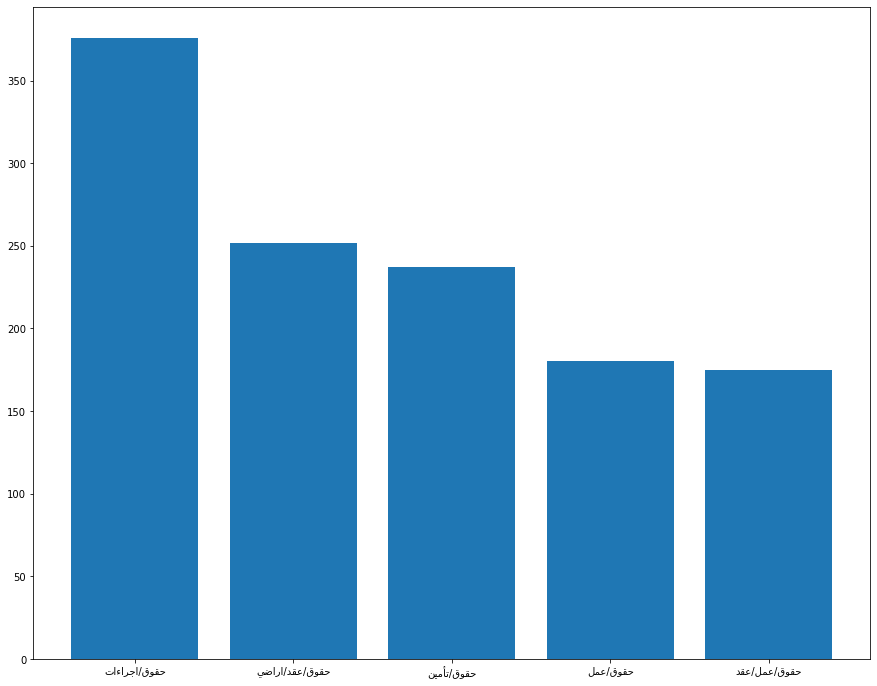

In [169]:
cleanData = data.dropna()
urlQueryIdData = cleanData[cleanData['UrlQuery'].str.startswith('CJID=')]
urlQuerygroupedByIdValues = urlQueryIdData.groupby( data['UrlQuery'],as_index=False).size()
idValuesData = urlQuerygroupedByIdValues.replace({'CJID=':''}, regex=True)
idValuesData.sort_values(['size'], ascending=False, inplace=True)
firstFiveValues = pd.DataFrame(idValuesData.head(5))
# 1 - 'حكم محكمة النقض المنعقدة في رام الله في  الدعوى الحقوقية رقم 1380 لسنة 2018'
# 2 - 'حكم محكمة النقض المنعقدة في رام الله في  الدعوى الحقوقية رقم 1283 لسنة 2016'
# 3 - 'حكم محكمة النقض المنعقدة في رام الله في  الدعوى الحقوقية رقم 214 لسنة 2015'
# 4 - 'حكم محكمة النقض المنعقدة في رام الله في  الدعوى الحقوقية رقم 1433 لسنة 2015'
# 5 - 'حكم محكمة النقض المنعقدة في رام الله في  الدعوى الحقوقية رقم 520 لسنة 2016'
firstFiveValues['judgmentName'] = [formatArabicSentences('حقوق/اجراءات'),
                                   formatArabicSentences('حقوق/عقد/اراضي'),
                                   formatArabicSentences('حقوق/تأمين'),
                                   formatArabicSentences('حقوق/عمل'),
                                   formatArabicSentences('حقوق/عمل/عقد')]
plt.figure(figsize=(15, 12))
plt.bar(firstFiveValues['judgmentName'], firstFiveValues['size'])

<BarContainer object of 10 artists>

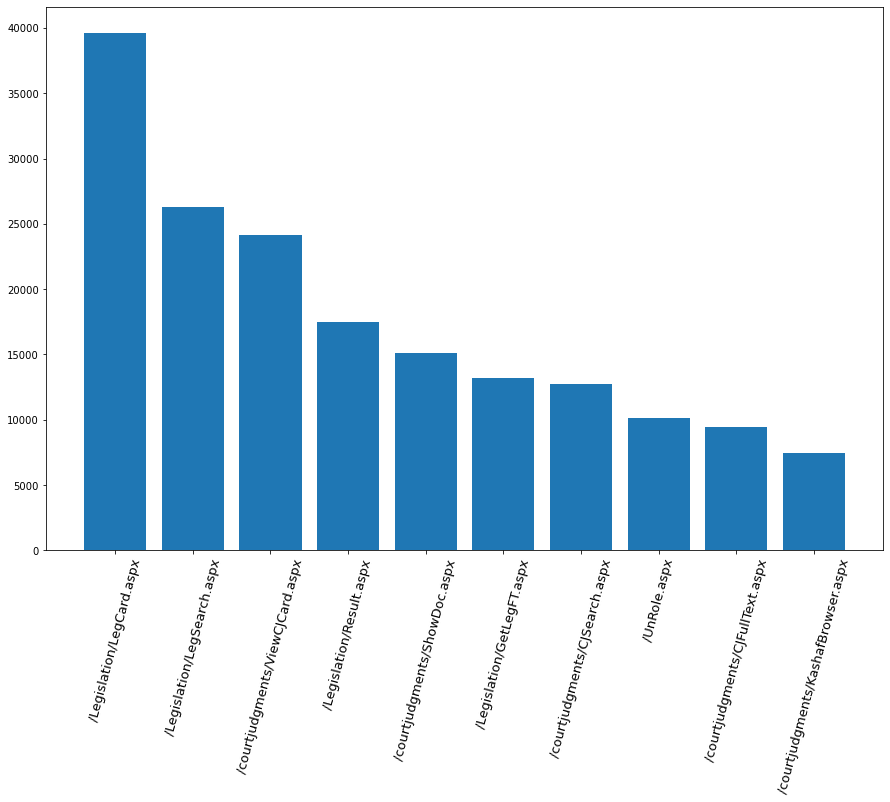

In [181]:
# Top 10 Requests
urlPathgroupedByIdValues = cleanData.groupby( data['UrlPath'],as_index=False).size()
urlPathgroupedByIdValues.sort_values(['size'], ascending=False, inplace=True)
firstTenValues = pd.DataFrame(urlPathgroupedByIdValues.head(10))
plt.figure(figsize=(15, 10))
plt.xticks(rotation=75)
plt.xticks(size=13)
plt.bar(firstTenValues['UrlPath'], firstTenValues['size'])

([<matplotlib.patches.Wedge at 0x1fc00527310>,
 [Text(-0.9496364367890279, 0.5551492032982113, 'Legislations'),
  Text(0.9496364627774366, -0.5551491588425208, 'Judgments')],
 [Text(-0.5179835109758334, 0.30280865634447884, '83%'),
  Text(0.517983525151329, -0.3028086320959204, '17%')])

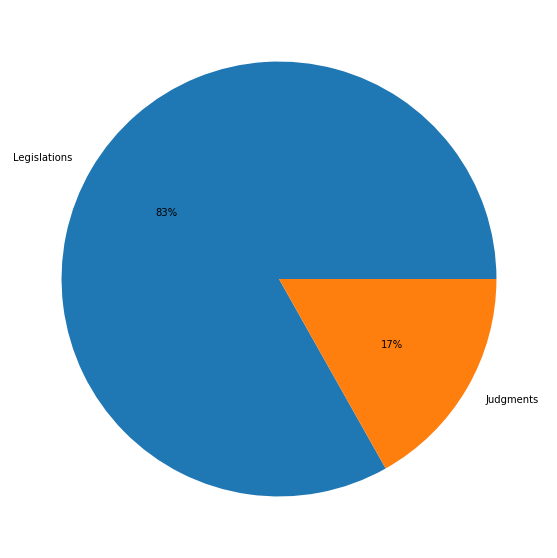

In [187]:
# Usage of CJ or Leg
legUsageData = data[
    (data['UrlPath'] == '/pg/getleg.asp') 
    | (data['UrlPath'] == '/Legislation/LegCard.aspx')
    | (data['UrlPath'] == '/Legislation/LegSearch.aspx')
    | (data['UrlPath'] == '/en/Legislation/Result.aspx')
    | (data['UrlPath'] == '/Legislation/Result.aspx')
    | (data['UrlPath'] == '/en/pg/getleg.asp')
    | (data['UrlPath'] == '/Legislation/ConsLegSearch.aspx')
    | (data['UrlPath'] == '/Legislation/GetLegConsFT.aspx')
]
judgmentsUsageData = data[
    (data['UrlPath'] == '/courtjudgments/ViewCJCard.aspx') 
    | (data['UrlPath'] == '/courtjudgments/CJSearch.aspx')
    | (data['UrlPath'] == '/courtjudgments/ShowDoc.aspx')
    | (data['UrlPath'] == '/courtjudgments/CJFullText.aspx')
    | (data['UrlPath'] == '/courtjudgments/KashafBrowser.aspx')
]
plt.figure(figsize=(12, 10))
plt.pie([legUsageData['UrlPath'].size, judgmentsUsageData['UrlPath'].size], labels=['Legislations', 'Judgments'],  autopct='%1.0f%%')

<BarContainer object of 3 artists>

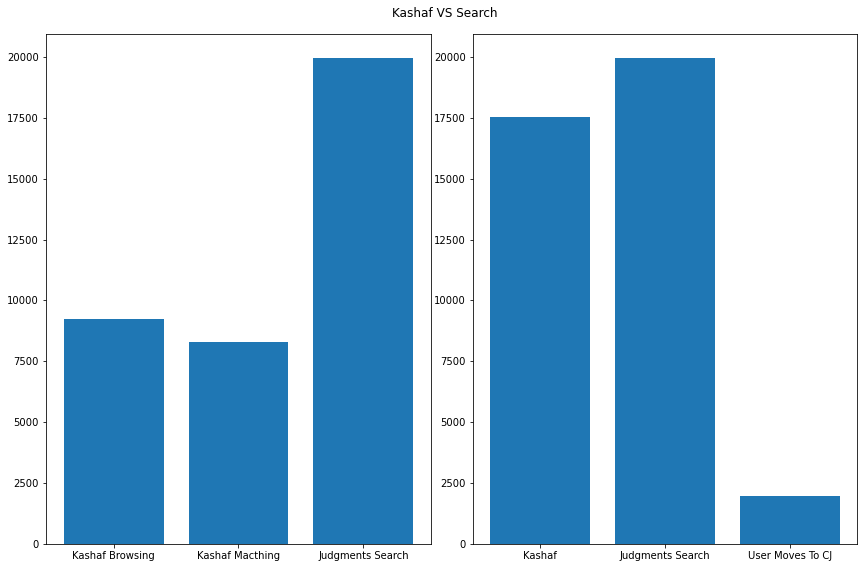

In [226]:
judgmentsSearch = data[(data['UrlPath'] == '/courtjudgments/CJSearch.aspx')]
kashafBrowsing =  data[(data['UrlPath'] == '/courtjudgments/KashafBrowser.aspx')]
kashafMatch =  data[(data['UrlPath'] == '/courtjudgments/KashafMatch.aspx')]
kashaf = data[(data['UrlPath'] == '/courtjudgments/KashafMatch.aspx' ) |(data['UrlPath'] == '/courtjudgments/KashafBrowser.aspx' ) ]
UserMovedToCJ = data[((data['RefererPath'] == 'Legislation/GetLegFT.aspx') & (data['UrlPath'] == '/Legislation/GetCJRelated.aspx'))]
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,8))
fig.suptitle('Kashaf VS Search')
fig.tight_layout()
ax1.bar(['Kashaf Browsing', 'Kashaf Macthing' ,'Judgments Search'], [kashafBrowsing['UrlPath'].size, kashafMatch['UrlPath'].size,judgmentsSearch['UrlPath'].size])
ax2.bar(['Kashaf' ,'Judgments Search', 'User Moves To CJ'], [kashaf['UrlPath'].size,judgmentsSearch['UrlPath'].size,UserMovedToCJ['UrlPath'].size ])

([<matplotlib.patches.Wedge at 0x1fc02c86040>,
 [Text(0.9396511621570085, 0.5718878329331579, 'Number of Cj In Legs'),
  Text(-0.9396511621570085, -0.5718878329331578, 'Number of Cj Not In Legs')],
 [Text(0.5125369975401863, 0.3119388179635406, '17%'),
  Text(-0.5125369975401863, -0.31193881796354056, '83%')])

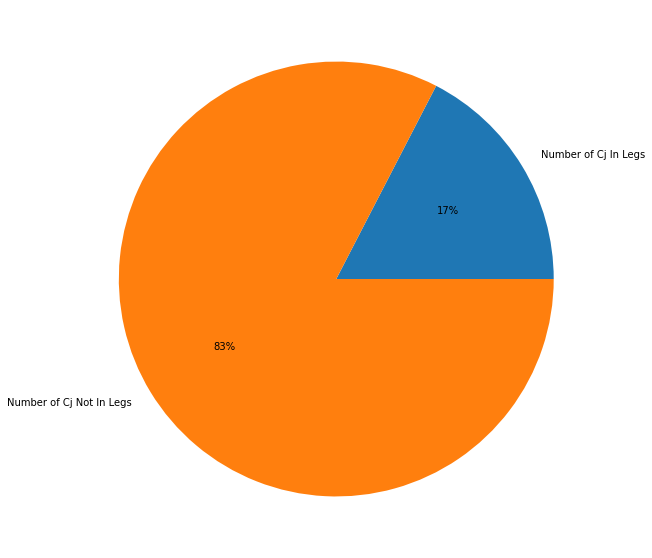

In [238]:
AllJudgments = 69850
numberOfCjInLeg = 12156
numberOfCjNotInLeg = AllJudgments - 12156
plt.figure(figsize=(12, 10))
plt.pie([numberOfCjInLeg, numberOfCjNotInLeg], labels=['Number of Cj In Legs', 'Number of Cj Not In Legs'],  autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x1fc02cb58e0>,
 [Text(-0.5148211877118599, 0.9720900908264368, 'Number of Kashaf Judgments'),
  Text(0.5148211877118594, -0.972090090826437, 'Number of Not Kashaf Judgments')],
 [Text(-0.2808115569337417, 0.5302309586326018, '66%'),
  Text(0.28081155693374144, -0.530230958632602, '34%')])

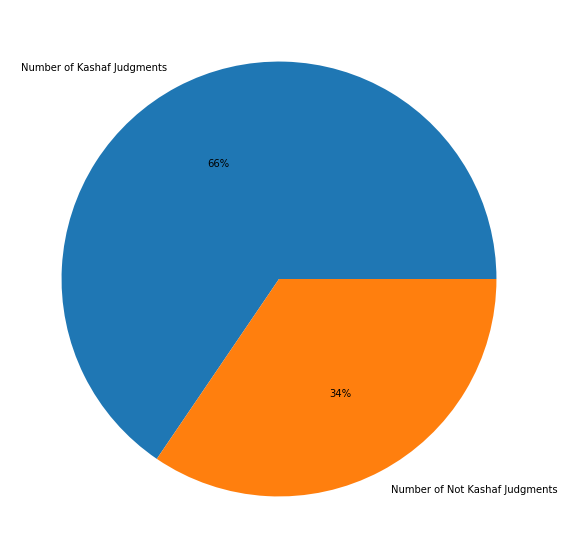

In [239]:
Kashafjudgments = 45754
notKashafJudgments = 24096

plt.figure(figsize=(12, 10))
plt.pie([Kashafjudgments, notKashafJudgments], labels=['Number of Kashaf Judgments', 'Number of Not Kashaf Judgments'],  autopct='%1.0f%%')

<BarContainer object of 2 artists>

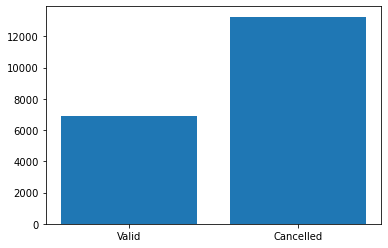

In [241]:
AllLegs = 21174
validLegs = 6880
cancelledLegs = 13250

plt.bar(['Valid', 'Cancelled'], [validLegs, cancelledLegs])

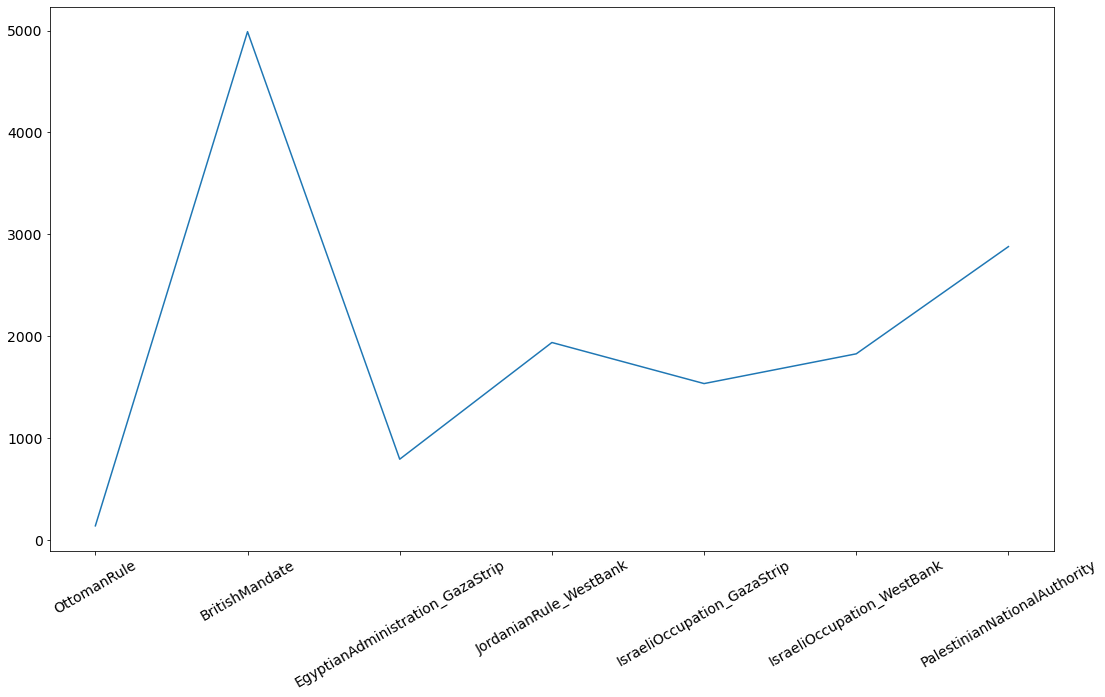

In [272]:
PalestinianNationalAuthority = 2880
OttomanRule = 140
JordanianRule_WestBank = 1939
IsraeliOccupation_GazaStrip = 1536
IsraeliOccupation_WestBank = 1828
BritishMandate = 4989
EgyptianAdministration_GazaStrip = 794
plt.figure(figsize=(18, 10))
plt.xticks(rotation=30)
plt.xticks(size=14)
plt.yticks(size=14)
plt.plot(['OttomanRule', 'BritishMandate', 'EgyptianAdministration_GazaStrip', 'JordanianRule_WestBank', 'IsraeliOccupation_GazaStrip' , 'IsraeliOccupation_WestBank', 'PalestinianNationalAuthority' ],[OttomanRule,BritishMandate,EgyptianAdministration_GazaStrip, JordanianRule_WestBank, IsraeliOccupation_GazaStrip,IsraeliOccupation_WestBank, PalestinianNationalAuthority ])  # density=False would make counts


<BarContainer object of 8 artists>

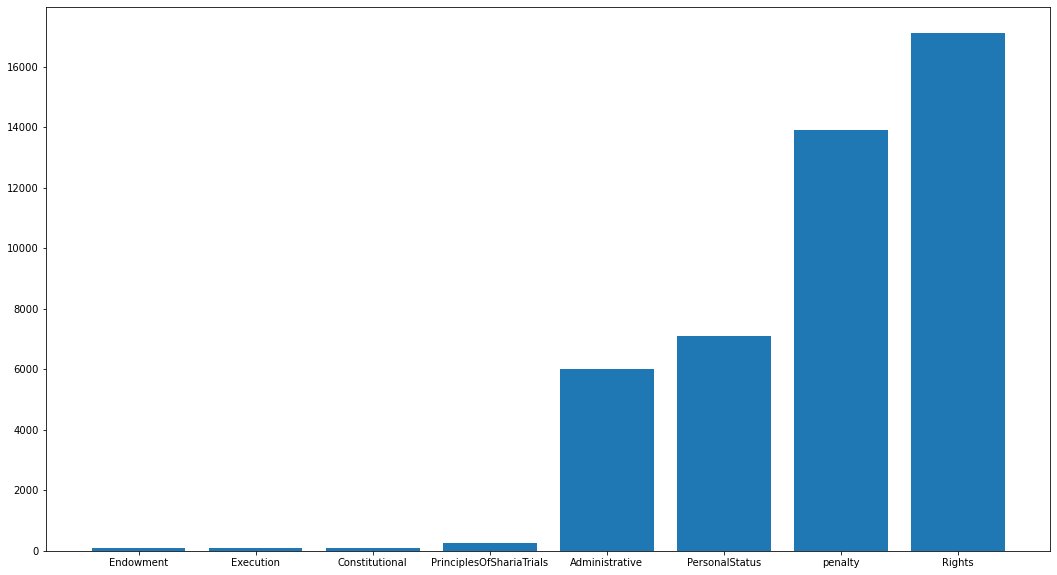

In [301]:
#Kashaf Numbers
Administrative = 6024
PersonalStatus = 7095
PrinciplesOfShariaTrials = 269
Endowment = 92
Execution = 95
penalty = 13921
Rights = 17108
Constitutional = 105
plt.figure(figsize=(18, 10))
plt.bar(['Endowment','Execution','Constitutional','PrinciplesOfShariaTrials','Administrative', 'PersonalStatus',
         'penalty', 'Rights'],[Endowment,Execution,Constitutional,PrinciplesOfShariaTrials,Administrative, PersonalStatus
                                                  ,penalty,Rights] )

([<matplotlib.patches.Wedge at 0x1fc19959400>,
 [Text(0.7086487349750764, 0.8413185903201141, 'Number of Legislation with XML'),
  Text(-0.7086486562051422, -0.8413186566685933, 'Number of Legislation with No XML')],
 [Text(0.3865356736227689, 0.4589010492655167, '28%'),
  Text(-0.38653563065735025, -0.45890108545559627, '72%')])

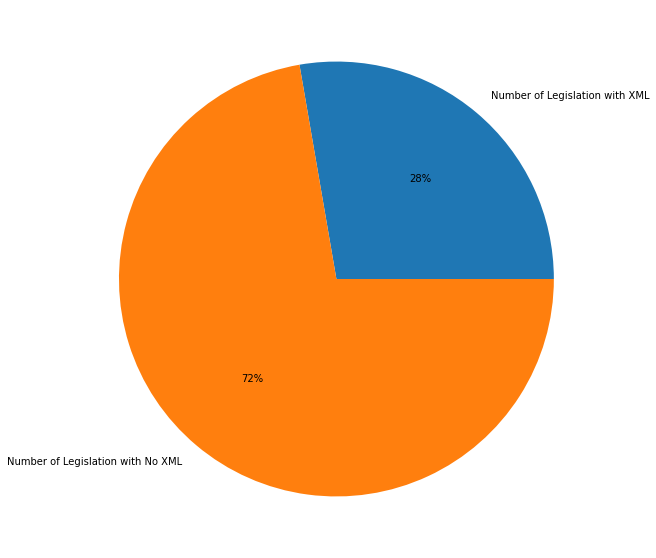

In [319]:
AllLegs = 21174
numberOfNoXml = 5869
numberOfLegsWithXml = AllLegs - numberOfNoXml

plt.figure(figsize=(12, 10))
plt.pie([numberOfNoXml, numberOfLegsWithXml], labels=['Number of Legislation with XML', 'Number of Legislation with No XML'] ,autopct='%1.0f%%')